In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# About dataset:
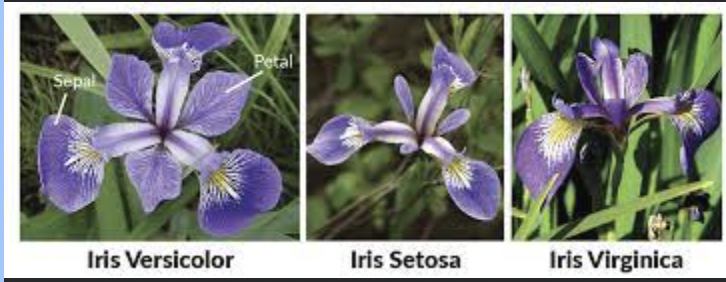


The Iris dataset consists of measurements of four features from three different species of iris flowers: setosa, versicolor, and virginica. The four features measured in centimeters are:

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

Each sample in the dataset represents a single iris flower, and the goal is typically to classify the flowers into one of the three species based on these four features. The dataset is relatively small, containing 150 samples, with 50 samples for each of the three species.

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Processing data

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Build a neural network with Pytorch

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Init parameter for model

In [ ]:
# Instantiate the model
input_size = X_train.shape[1]
output_size = len(torch.unique(y_train_tensor))
model = Model(input_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
epochs = 500

In [ ]:
# Print net architecture
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)


## Training model

In [ ]:
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)

    # Compute loss
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/500], Loss: 1.0934
Epoch [20/500], Loss: 1.0866
Epoch [30/500], Loss: 1.0783
Epoch [40/500], Loss: 1.0693
Epoch [50/500], Loss: 1.0601
Epoch [60/500], Loss: 1.0503
Epoch [70/500], Loss: 1.0401
Epoch [80/500], Loss: 1.0290
Epoch [90/500], Loss: 1.0169
Epoch [100/500], Loss: 1.0033
Epoch [110/500], Loss: 0.9884
Epoch [120/500], Loss: 0.9729
Epoch [130/500], Loss: 0.9569
Epoch [140/500], Loss: 0.9404
Epoch [150/500], Loss: 0.9234
Epoch [160/500], Loss: 0.9062
Epoch [170/500], Loss: 0.8890
Epoch [180/500], Loss: 0.8718
Epoch [190/500], Loss: 0.8547
Epoch [200/500], Loss: 0.8382
Epoch [210/500], Loss: 0.8223
Epoch [220/500], Loss: 0.8073
Epoch [230/500], Loss: 0.7932
Epoch [240/500], Loss: 0.7798
Epoch [250/500], Loss: 0.7673
Epoch [260/500], Loss: 0.7556
Epoch [270/500], Loss: 0.7446
Epoch [280/500], Loss: 0.7342
Epoch [290/500], Loss: 0.7244
Epoch [300/500], Loss: 0.7152
Epoch [310/500], Loss: 0.7064
Epoch [320/500], Loss: 0.6981
Epoch [330/500], Loss: 0.6902
Epoch [340/500], Lo

## Evalution model

In [ ]:
# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    print(predicted)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')

tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 0])
Test Accuracy: 0.6333


In [ ]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.7620, 0.9338, 0.7088],
        [0.5663, 0.0682, 0.6759]])
